In [126]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)
print(np.__version__)
print(keras.__version__)

1.12.0
1.14.3
2.1.6-tf


In [127]:
imdb = keras.datasets.imdb


In [128]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [129]:
print("Training Data: {},Labels:{}".format(len(train_data), len(train_labels)))

Training Data: 25000,Labels:25000


In [130]:
print(train_data[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [131]:
word_index = imdb.get_word_index()

word_index = {k: v+3 for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(key,value) for (value,key) in word_index.items()])

def get_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [132]:
print(train_data[9])
print(get_review(train_data[9]))


[1, 14, 20, 47, 111, 439, 3445, 19, 12, 15, 166, 12, 216, 125, 40, 6, 364, 352, 707, 1187, 39, 294, 11, 22, 396, 13, 28, 8, 202, 12, 1109, 23, 94, 2, 151, 111, 211, 469, 4, 20, 13, 258, 546, 1104, 7273, 12, 16, 38, 78, 33, 211, 15, 12, 16, 2849, 63, 93, 12, 6, 253, 106, 10, 10, 48, 335, 267, 18, 6, 364, 1242, 1179, 20, 19, 6, 1009, 7, 1987, 189, 5, 6, 8419, 7, 2723, 2, 95, 1719, 6, 6035, 7, 3912, 7144, 49, 369, 120, 5, 28, 49, 253, 10, 10, 13, 1041, 19, 85, 795, 15, 4, 481, 9, 55, 78, 807, 9, 375, 8, 1167, 8, 794, 76, 7, 4, 58, 5, 4, 816, 9, 243, 7, 43, 50]
<START> this movie has many problem associated with it that makes it come off like a low budget class project from someone in film school i have to give it credit on its <UNK> though many times throughout the movie i found myself laughing hysterically it was so bad at times that it was comical which made it a fun watch br br if you're looking for a low grade slasher movie with a twist of psychological horror and a dash of campy <UNK

In [133]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"], 
                                                        padding = 'post', 
                                                        maxlen = 256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=word_index["<PAD>"], 
                                                        padding = 'post', 
                                                        maxlen = 256)

In [134]:
len(train_data[100]), len(train_data[100])

(256, 256)

In [135]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(16,activation=tf.nn.softmax))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [137]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [138]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=256,
                   validation_data=(x_val,y_val),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.6935 - acc: 0.4965 - val_loss: 0.6926 - val_acc: 0.5053
Epoch 2/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.6916 - acc: 0.6185 - val_loss: 0.6898 - val_acc: 0.7327
Epoch 3/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.6855 - acc: 0.7902 - val_loss: 0.6802 - val_acc: 0.7755
Epoch 4/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.6674 - acc: 0.8282 - val_loss: 0.6542 - val_acc: 0.8166
Epoch 5/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.6282 - acc: 0.8439 - val_loss: 0.6089 - val_acc: 0.8240
Epoch 6/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.5749 - acc: 0.8546 - val_loss: 0.5604 - val_acc: 0.8312
Epoch 7/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.5245 - acc: 0.8622 - val_loss: 0.5204 - 

In [139]:
result = model.evaluate(test_data,test_labels)
print(result)

25000/25000 [==============================] - 1s 30us/step
[0.3791637990474701, 0.84488]


In [140]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

range(1, 21)


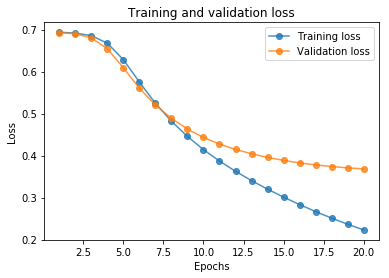

In [141]:
import matplotlib.pyplot as plt



loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
print(epochs)

plt.plot(epochs, loss, marker='o', alpha=0.8, label='Training loss')
plt.plot(epochs, val_loss, marker='o', alpha=0.8, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

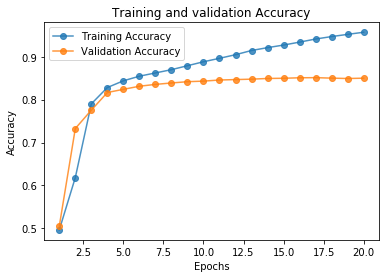

In [142]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, marker='o', alpha=0.8, label='Training Accuracy')
plt.plot(epochs, val_acc, marker='o', alpha=0.8, label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [169]:
#I think it is not good movie
#I do not like to recommend this movie
#I think it is bad movie
string ="A Summer Film That Is Better Than The Hype"

In [170]:
predictions = model.predict_classes([test_data])

string_list = string.split(None)
custom_review = np.zeros(256)
custom_review[0] = 1
for i in range(len(string_list)):
    if string_list[i] in word_index :
        custom_review[i+1] = word_index[string_list[i]]
    else:
        custom_review[i] = 2
prediction_result = model.predict_classes([[custom_review]])
if (prediction_result == 1):
    print("Result=",prediction_result,": Positive")
    print('')
else:
    print("Result=",prediction_result,": Negative")
    print('')

Result= [[1]] : Positive

